<a href="https://www.kaggle.com/code/yusifmamverdiyev/email-phising-dataset?scriptVersionId=235603516" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

In [2]:
data=pd.read_csv('/kaggle/input/email-phishing-dataset/email_phishing_data.csv')

In [3]:
data.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [4]:
data.tail()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
524841,782,327,301,2,2,2,52,1,0
524842,36,30,11,0,0,0,4,0,1
524843,61,46,11,0,0,0,3,0,0
524844,213,136,89,0,0,0,18,0,0
524845,26,24,3,0,0,0,2,0,0


In [5]:
data.isnull().sum()

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64

In [6]:
lb=LabelEncoder()
data['label'] = lb.fit_transform(data['label'])


In [7]:
X=data.drop(columns=['label'])

In [8]:
y=data['label']

In [9]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix , accuracy_score 

In [10]:
models={
    'Random Forest':RandomForestClassifier(),
    'Support Vector ':SVC(),
    'Gaussian':GaussianNB(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'Logistic':LogisticRegression()
}

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
import seaborn as sns 

Model: Random Forest
Accuracy: 98.97%


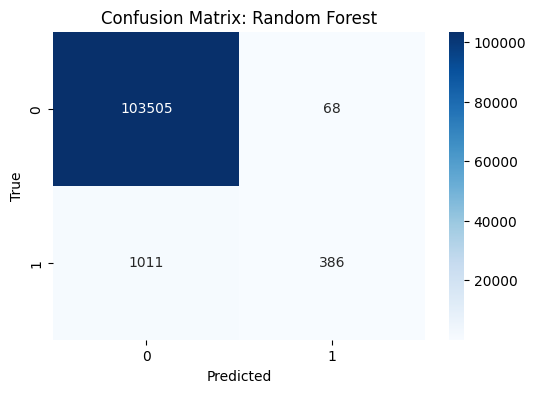

Model: Support Vector 
Accuracy: 98.67%


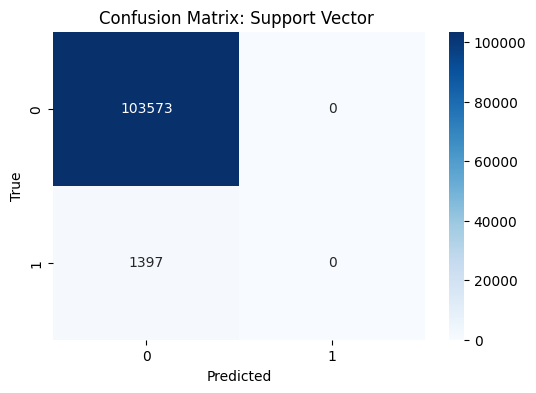

Model: Gaussian
Accuracy: 15.92%


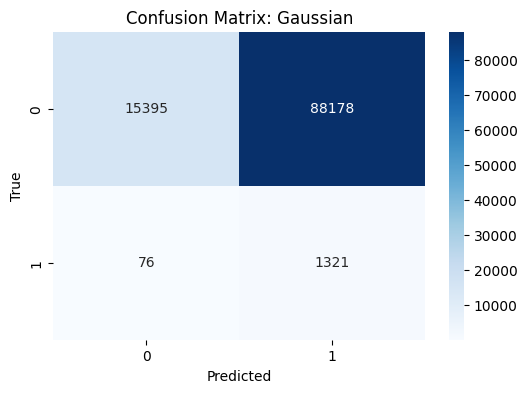

Model: Gradient Boosting
Accuracy: 98.71%


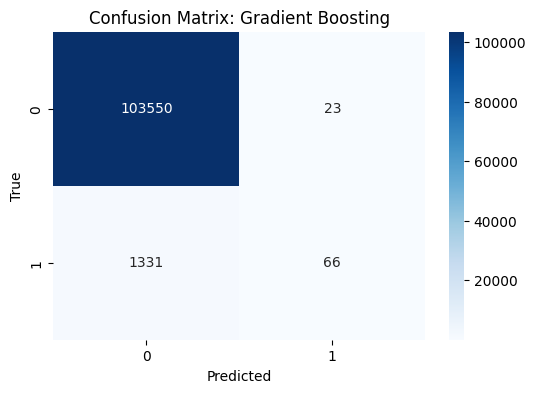

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic
Accuracy: 98.67%


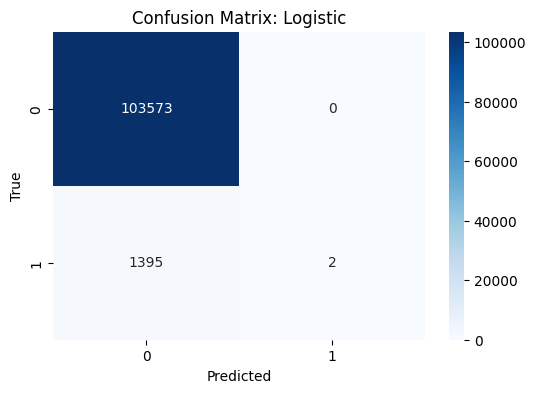

In [13]:
for model_name, model in models.items():
    
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    accuracy=accuracy_score(y_pred,y_test)

    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()